In [6]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#importing lybraries

In [2]:
df = pd.read_csv("C:/users/Awan/Turbine_Data.csv", parse_dates=["Unnamed: 0"])
#reading file 

In [3]:
df.tail()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,...,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,...,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,...,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,...,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468
118223,2020-03-30 23:50:00+00:00,68.664425,27.915828,45.231610,1.499323,1.933124,1.933124,0.0,58.581716,54.080505,...,56.741040,39.003815,35.914062,203.0,14.439669,9.235532,2.0,G01,203.0,3.475205


In [4]:
df.shape

(118224, 22)

In [5]:
df.drop(['ControlBoxTemperature','WTG'], axis=1 , inplace=True)
#droping columns

In [6]:
df.isnull().sum()
#showing number of null values

Unnamed: 0                          0
ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WindDirection                   45946
WindSpeed                       23629
dtype: int64

In [7]:
df['DateTime'] = df['Unnamed: 0'] 
df.drop('Unnamed: 0', axis=1, inplace=True)
df = df.set_index('DateTime')
#setting index

In [8]:
from math import sqrt
for ind, row in df.iterrows():
    df.loc[ind,"Apparent Power"]=sqrt(row['ActivePower']**2 + row['ReactivePower']**2)
    df.loc[ind,"GearRatio"]=(row['GeneratorRPM']/row['RotorRPM'])
#adding features

<ipython-input-8-90ce80f84d74>:4: RuntimeWarning: invalid value encountered in double_scalars
  df.loc[ind,"GearRatio"]=(row['GeneratorRPM']/row['RotorRPM'])
<ipython-input-8-90ce80f84d74>:4: RuntimeWarning: divide by zero encountered in double_scalars
  df.loc[ind,"GearRatio"]=(row['GeneratorRPM']/row['RotorRPM'])


In [9]:
from scipy import interpolate
df_new = df.interpolate(method="time",limit_direction='backward')
df_new
#interpolating

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,...,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed,Apparent Power,GearRatio
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,42.996094,41.898426,8.0,-9.960830,15.708135,0.0,8.0,2.279088,11.310322,111.516454
2017-12-31 00:10:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,42.996094,41.898426,8.0,-9.960830,15.708135,0.0,8.0,2.279088,11.310322,111.516454
2017-12-31 00:20:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,42.996094,41.898426,8.0,-9.960830,15.708135,0.0,8.0,2.279088,11.310322,111.516454
2017-12-31 00:30:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,42.996094,41.898426,8.0,-9.960830,15.708135,0.0,8.0,2.279088,11.310322,111.516454
2017-12-31 00:40:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,42.996094,41.898426,8.0,-9.960830,15.708135,0.0,8.0,2.279088,11.310322,111.516454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,59.821165,55.193793,1029.870744,59.060367,...,39.008931,36.476562,178.0,13.775785,9.234004,2.0,178.0,3.533445,71.386269,111.530241
2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,59.142038,54.798545,1030.160478,58.452003,...,39.006759,36.328125,178.0,8.088928,9.229370,2.0,178.0,3.261231,41.626955,111.617632
2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,58.439439,54.380456,1030.137822,58.034071,...,39.003815,36.131944,178.0,4.355978,9.236802,2.0,178.0,3.331839,21.229486,111.525372


In [10]:
df_new.replace([np.inf, -np.inf], np.nan, inplace=True)
#replacing inf values to nan

In [11]:
df_new.fillna(-99999,inplace = True)
#assigning nan to big negative integer value

In [12]:
df_new['Sr.Num']= range (0, len(df_new.index.values))
#add new column

In [13]:
df_new.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,...,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed,Apparent Power,GearRatio,Sr.Num
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,41.898426,8.0,-9.96083,15.708135,0.0,8.0,2.279088,11.310322,111.516454,0
2017-12-31 00:10:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,41.898426,8.0,-9.96083,15.708135,0.0,8.0,2.279088,11.310322,111.516454,1
2017-12-31 00:20:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,41.898426,8.0,-9.96083,15.708135,0.0,8.0,2.279088,11.310322,111.516454,2
2017-12-31 00:30:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,41.898426,8.0,-9.96083,15.708135,0.0,8.0,2.279088,11.310322,111.516454,3
2017-12-31 00:40:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,41.898426,8.0,-9.96083,15.708135,0.0,8.0,2.279088,11.310322,111.516454,4


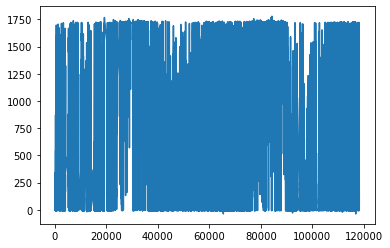

In [14]:
fig= plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.plot('Sr.Num','ActivePower', data=df_new)

In [15]:
one_tenth= df_new.sample(frac = .1,random_state= np.random.randint(10))
#sampling one tenth of random data

In [16]:
one_tenth.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,...,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed,Apparent Power,GearRatio,Sr.Num
DateTime,,,,,,,,,,,,,,,,,,,,,
2018-03-31 06:30:00+00:00,30.637050,34.313349,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,41.898426,87.500,3.466833,15.708135,0.0,87.500,3.359435,30.832577,111.516454,12999
2019-01-05 20:00:00+00:00,759.412640,20.407032,43.782306,45.736893,43.699357,43.699357,67.839099,56.601328,1339.434330,70.020122,...,30.168750,207.875,153.639708,12.019821,2.0,207.875,6.957490,774.798501,111.435466,53400
2019-08-15 04:20:00+00:00,824.366594,29.179934,48.547828,-1.140415,-0.298375,-0.298375,73.846226,63.222256,1390.110680,94.026161,...,41.087510,338.500,167.810476,12.469251,2.0,338.500,6.460945,841.273224,111.483097,85274
2020-02-19 16:50:00+00:00,1679.331089,24.924135,49.240650,1.696416,2.095443,2.095443,73.727999,61.811911,1737.692160,107.160320,...,38.006924,178.000,339.676615,15.585889,2.0,178.000,8.811566,1713.339753,111.491376,112421
2019-04-29 08:50:00+00:00,18.921567,38.106027,43.996612,45.736893,43.699357,43.699357,59.653151,55.535620,871.924165,57.126674,...,48.175459,6.000,2.178631,7.129063,2.0,6.000,2.838435,19.046578,122.305583,69749


In [17]:
one_tenth = one_tenth.sort_values(by=('Sr.Num'),ascending=[True])
#sorting in ascending order

In [18]:
one_tenth.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,...,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed,Apparent Power,GearRatio,Sr.Num
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-12-31 04:10:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,41.898426,8.0,-9.96083,15.708135,0.0,8.0,2.279088,11.310322,111.516454,25
2017-12-31 06:40:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,41.898426,8.0,-9.96083,15.708135,0.0,8.0,2.279088,11.310322,111.516454,40
2017-12-31 06:50:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,41.898426,8.0,-9.96083,15.708135,0.0,8.0,2.279088,11.310322,111.516454,41
2017-12-31 09:00:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,41.898426,8.0,-9.96083,15.708135,0.0,8.0,2.279088,11.310322,111.516454,54
2017-12-31 10:20:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,41.898426,8.0,-9.96083,15.708135,0.0,8.0,2.279088,11.310322,111.516454,62


In [19]:
one_tenth.shape

(11822, 22)

Text(0.5, 0, 'Sr.Num')

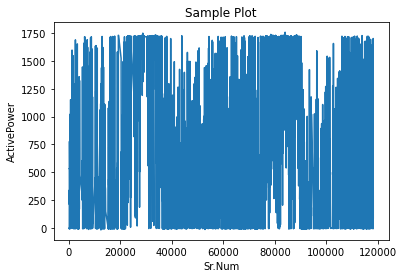

In [20]:
axes= one_tenth.plot('Sr.Num','ActivePower', legend=False,title='Sample Plot');
axes.legend=None;
axes.set_ylabel('ActivePower')
axes.set_xlabel('Sr.Num')

In [21]:
one_tenth['Rolling_Mean_of_ActivePower'] = one_tenth['ActivePower'].rolling(window=800).mean()
#creating rolling mean of active power and add it as feature

In [22]:
one_tenth.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,...,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed,Apparent Power,GearRatio,Sr.Num,Rolling_Mean_of_ActivePower
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-12-31 04:10:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,8.0,-9.96083,15.708135,0.0,8.0,2.279088,11.310322,111.516454,25,NaN
2017-12-31 06:40:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,8.0,-9.96083,15.708135,0.0,8.0,2.279088,11.310322,111.516454,40,NaN
2017-12-31 06:50:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,8.0,-9.96083,15.708135,0.0,8.0,2.279088,11.310322,111.516454,41,NaN
2017-12-31 09:00:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,8.0,-9.96083,15.708135,0.0,8.0,2.279088,11.310322,111.516454,54,NaN
2017-12-31 10:20:00+00:00,-5.357727,23.148729,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,8.0,-9.96083,15.708135,0.0,8.0,2.279088,11.310322,111.516454,62,NaN


In [23]:
one_tenth.tail()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,...,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed,Apparent Power,GearRatio,Sr.Num,Rolling_Mean_of_ActivePower
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-03-30 16:40:00+00:00,1702.947553,30.116235,53.357090,1.909889,1.979416,1.979416,75.101142,64.133891,1749.588910,113.033420,...,169.0,345.247200,15.681722,2.0,169.0,9.091157,1737.592011,111.568674,118180,505.066639
2020-03-30 16:50:00+00:00,1477.510144,29.961500,53.433864,-0.376014,0.164833,0.164833,73.740430,62.974729,1681.528233,111.805790,...,175.0,301.962268,15.086439,2.0,175.0,8.317894,1508.050874,111.459586,118181,506.548228
2020-03-30 18:40:00+00:00,825.696446,28.795890,51.276608,-1.000282,-0.566086,-0.566086,67.180545,56.549730,1388.599000,85.987901,...,185.0,168.852583,12.457394,2.0,185.0,6.810450,842.784560,111.467858,118192,507.285592
2020-03-30 19:00:00+00:00,719.050113,28.451522,50.551569,-1.000329,-0.566086,-0.566086,65.632074,55.696751,1322.175280,81.755016,...,182.0,144.977105,11.853638,2.0,182.0,6.912979,733.519888,111.541726,118194,508.086303
2020-03-30 23:00:00+00:00,90.331065,27.581193,45.819084,1.411808,1.846226,1.846226,60.275851,55.552022,1029.805433,59.648732,...,178.0,17.792888,9.235228,2.0,178.0,3.612339,92.066760,111.508392,118218,507.418815


Text(0, 0.5, 'Rolling_Mean')

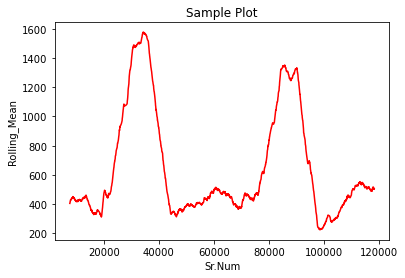

In [24]:
axes= one_tenth.plot('Sr.Num','Rolling_Mean_of_ActivePower', legend=False,title='Sample Plot', color= 'red');
axes.legend=None;
axes.set_ylabel('Rolling_Mean')

In [25]:
filt_df= one_tenth[(one_tenth['Sr.Num']>= 10000)& (one_tenth['Sr.Num']<=100000)]
#filtering data

In [26]:
filt_df.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,...,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed,Apparent Power,GearRatio,Sr.Num,Rolling_Mean_of_ActivePower
DateTime,,,,,,,,,,,,,,,,,,,,,
2018-03-10 12:00:00+00:00,340.193406,24.782424,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,305.207921,67.396100,15.708135,0.0,305.207921,5.135353,350.233737,111.516454,10008,418.939925
2018-03-10 12:50:00+00:00,342.371161,24.766865,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,305.133663,67.870308,15.708135,0.0,305.133663,5.152695,352.382849,111.516454,10013,419.289289
2018-03-10 14:00:00+00:00,345.420018,24.745081,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,305.029703,68.534199,15.708135,0.0,305.029703,5.176973,355.391604,111.516454,10020,419.728175
2018-03-10 14:40:00+00:00,347.162222,24.732633,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,304.970297,68.913566,15.708135,0.0,304.970297,5.190847,357.110893,111.516454,10024,419.989262
2018-03-10 16:20:00+00:00,351.517732,24.701514,47.901936,45.736893,43.699357,43.699357,77.119133,64.204399,1751.715563,113.290871,...,304.821782,69.861982,15.708135,0.0,304.821782,5.225531,361.409116,111.516454,10034,420.254783


In [27]:
filt_df.shape

(8963, 23)

In [28]:
filt_df.dtypes

ActivePower                     float64
AmbientTemperatue               float64
BearingShaftTemperature         float64
Blade1PitchAngle                float64
Blade2PitchAngle                float64
Blade3PitchAngle                float64
GearboxBearingTemperature       float64
GearboxOilTemperature           float64
GeneratorRPM                    float64
GeneratorWinding1Temperature    float64
GeneratorWinding2Temperature    float64
HubTemperature                  float64
MainBoxTemperature              float64
NacellePosition                 float64
ReactivePower                   float64
RotorRPM                        float64
TurbineStatus                   float64
WindDirection                   float64
WindSpeed                       float64
Apparent Power                  float64
GearRatio                       float64
Sr.Num                            int32
Rolling_Mean_of_ActivePower     float64
dtype: object

In [29]:
df_wind= filt_df[['AmbientTemperatue','BearingShaftTemperature','Blade1PitchAngle','Blade2PitchAngle','Blade3PitchAngle','GeneratorRPM','NacellePosition','ReactivePower','RotorRPM','WindDirection','WindSpeed','Apparent Power','GearRatio','Rolling_Mean_of_ActivePower']]

In [30]:
df_wind.head()

,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GeneratorRPM,NacellePosition,ReactivePower,RotorRPM,WindDirection,WindSpeed,Apparent Power,GearRatio,Rolling_Mean_of_ActivePower
DateTime,,,,,,,,,,,,,,
2018-03-10 12:00:00+00:00,24.782424,47.901936,45.736893,43.699357,43.699357,1751.715563,305.207921,67.396100,15.708135,305.207921,5.135353,350.233737,111.516454,418.939925
2018-03-10 12:50:00+00:00,24.766865,47.901936,45.736893,43.699357,43.699357,1751.715563,305.133663,67.870308,15.708135,305.133663,5.152695,352.382849,111.516454,419.289289
2018-03-10 14:00:00+00:00,24.745081,47.901936,45.736893,43.699357,43.699357,1751.715563,305.029703,68.534199,15.708135,305.029703,5.176973,355.391604,111.516454,419.728175
2018-03-10 14:40:00+00:00,24.732633,47.901936,45.736893,43.699357,43.699357,1751.715563,304.970297,68.913566,15.708135,304.970297,5.190847,357.110893,111.516454,419.989262
2018-03-10 16:20:00+00:00,24.701514,47.901936,45.736893,43.699357,43.699357,1751.715563,304.821782,69.861982,15.708135,304.821782,5.225531,361.409116,111.516454,420.254783


In [31]:
forecast_col = 'Rolling_Mean_of_ActivePower'
forecast_len = 144

In [32]:
df_wind['label'] = df_wind[forecast_col].shift(-forecast_len)

<ipython-input-32-81b960201b5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind['label'] = df_wind[forecast_col].shift(-forecast_len)


In [33]:
df_wind.head()

,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GeneratorRPM,NacellePosition,ReactivePower,RotorRPM,WindDirection,WindSpeed,Apparent Power,GearRatio,Rolling_Mean_of_ActivePower,label
DateTime,,,,,,,,,,,,,,,
2018-03-10 12:00:00+00:00,24.782424,47.901936,45.736893,43.699357,43.699357,1751.715563,305.207921,67.396100,15.708135,305.207921,5.135353,350.233737,111.516454,418.939925,430.503246
2018-03-10 12:50:00+00:00,24.766865,47.901936,45.736893,43.699357,43.699357,1751.715563,305.133663,67.870308,15.708135,305.133663,5.152695,352.382849,111.516454,419.289289,430.693034
2018-03-10 14:00:00+00:00,24.745081,47.901936,45.736893,43.699357,43.699357,1751.715563,305.029703,68.534199,15.708135,305.029703,5.176973,355.391604,111.516454,419.728175,430.974077
2018-03-10 14:40:00+00:00,24.732633,47.901936,45.736893,43.699357,43.699357,1751.715563,304.970297,68.913566,15.708135,304.970297,5.190847,357.110893,111.516454,419.989262,430.478001
2018-03-10 16:20:00+00:00,24.701514,47.901936,45.736893,43.699357,43.699357,1751.715563,304.821782,69.861982,15.708135,304.821782,5.225531,361.409116,111.516454,420.254783,429.204437


In [34]:
df_wind.fillna(0,inplace = True)

C:\New folder\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [35]:
df_wind.dtypes

AmbientTemperatue              float64
BearingShaftTemperature        float64
Blade1PitchAngle               float64
Blade2PitchAngle               float64
Blade3PitchAngle               float64
GeneratorRPM                   float64
NacellePosition                float64
ReactivePower                  float64
RotorRPM                       float64
WindDirection                  float64
WindSpeed                      float64
Apparent Power                 float64
GearRatio                      float64
Rolling_Mean_of_ActivePower    float64
label                          float64
dtype: object

In [36]:
X = np.array(df_wind.drop(['label'],1))
y = np.array(df_wind['label'])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [38]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [39]:
accuracy = reg.score(X_test, y_test)
print(accuracy)

0.9366999257369557


In [40]:
y_pred = reg.predict(X_test)
df_wind= pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
print (df_wind)

           Actual    Predicted
0      396.460116   370.323059
1      461.879245   474.302716
2     1325.131514  1189.671605
3      470.967569   416.577019
4      399.484379   515.730330
...           ...          ...
1788  1318.400973  1277.836496
1789   333.734017   274.704061
1790   365.576517   289.393045
1791  1127.164437   768.496462
1792   356.082479   465.855714

[1793 rows x 2 columns]


In [41]:
pred = reg.predict(X_test)
import math
from statistics import mean
from sklearn.metrics import r2_score 
print('R-squared: %.2f' % r2_score(y_test, pred))

R-squared: 0.94


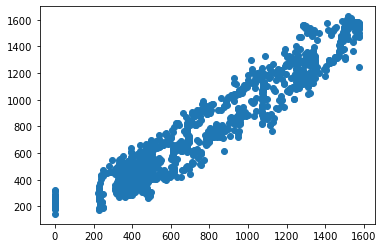

In [42]:
plt.scatter(y_test,pred)


In [43]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, pred)*100
print(mape)

7629.860128376613


In [48]:
y_predict_pr = PolyReg.predict(Polynom.fit_transform(X_test))

from sklearn import metrics
r_square = metrics.r2_score(y_test,y_predict_pr)
print('accuracy:', r_square)

accuracy: 0.9615903399509439
